------------------------------------------
------------------------------------------
# <p style="background-color:#CCE3F2; font-family:newtimeroman; font-size:175%; text-align:center; border-radius: 15px 50px;">Data Analysis using SQL and Pandas</p>

------------------------------------------
------------------------------------------

<p style="background-color:skyblue; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 10px 100px;"><b>Introduction</b></p>
<b>
<li>In this notebook i will do some data cleaning and data analysis using SQL and Pandas.</li>
<br>
<li>This data from <a href="https://www.coursera.org/learn/data-wrangling-analysis-abtesting">Data Wrangling, Analysis and AB Testing with SQL</a> Coursera course from University of California, and i will join all the data together in one database using python library <b><a href="https://docs.python.org/3/library/sqlite3.html">sqlite3</a></b>,then i will try to do some data analysis and data visualization using <b>plotly</b> library (more intractive) and answer some questions.</li>
<br>
<p style="background-color:skyblue; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 10px 100px;">Outline:</p>
<ul>
   <li><a href="#Importing the needed libraries">Importing the needed libraries</a></li>
   <li><a href="#Importing the data and join them in a database">Importing the data and join them in a database and explore our tables</a></li>
   <li><a href="#EDA">EDA</a></li>
   <li>
      <a href="#Answering some quistions:">Answering some quistions:</a>
      <ul>
         <li><a href="#q1">How many users do we have?</a></li>
         <li><a href="#q2">What is the number of users who have ordered an item?</a></li>
         <li><a href="#q3">What is the number of events for each event name?</a></li>
         <li><a href="#q4">What is the number of events for each Platform?</a></li>
         <li><a href="#q5">What is the number of items for sale in each category?</a></li>
         <li><a href="#q6">What is the number of view user profile?</a></li>
         <li><a href="#q7">How many email address for each email domains?</a></li>
         <li><a href="#q8">Show the users who have viewed items?</a></li>
         <li><a href="#q9">Create a tables for each event name (view_item, view_user_profile, test_assignment events)</a></li>
         <li><a href="#q10">What percent of users have viewed items for each product category?</a></li>
         <li><a href="#q11">How many items have been purchased and how many items do we have?</a></li>
         <li><a href="#q12">How many items have been purchased for each category?</a></li>
         <li><a href="#q13">How many orders are placed each day?</a></li>
         <li><a href="#q14">What is the most recently viewed item for each user?</a></li>
         <li><a href="#q15">How long ago was their most recent view?</a></li>
         <li><a href="#q16">How many users have reordered an item?</a></li>
         <li><a href="#q17">How many users have reordered the same item?</a></li>
         <li><a href="#q18">How many orders per items?</a></li>
         <li><a href="#q19">How many orders per category?</a></li>
         <li><a href="#q20">What is the avgerage times each category has ordered?</a></li>
         <li><a href="#q21">What is the average time between orders?</a></li>
      </ul>
</ul>
<li><a href="#filter">create a filter function  to apply a filter on our data using pandas</a></li>
<br>

<a id='Importing the needed libraries'></a>
<h2>Importing the needed libraries

In [8]:
#basic libraries
import os
import re
import csv
import sqlite3
import pandas as pd
import pandasql as ps
import numpy as np

#visualization libraaries
import matplotlib.pyplot as plt
import seaborn as sns

# To connect java script to your notebook
original_path = 'data'

<a id='Importing the data and join them in a database'></a>
<h2>Importing the data and join them in a database</h2>

In [9]:
files = ['dsv1069_users.csv','dsv1069_orders.csv','dsv1069_events.csv',
         'dsv1069_items.csv','dsc1069_date_rollup.csv']

In [10]:
conn = sqlite3.connect('data.db')
c = conn.cursor()

for file in files:
    tb_name = ''.join(re.findall('([A-Za-z]+)',file)[1:-1])
    df = pd.read_csv(os.path.join(original_path,file))
    df.to_sql(tb_name, conn, if_exists='append', index=False)

C:\Users\ALAASE~1\AppData\Local\Temp/ipykernel_12764/639851152.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(original_path,file))


## Lets Explore our tables 

In [11]:
# lets define these functions to be able to write sql query easily !!

def sq(q):
    with conn:
        return pd.read_sql_query(q, conn)

# the same function but rename the columns to be more readable
def sq1(q):
    with conn:
        return pd.read_sql_query(q, conn).rename(columns=lambda x : x.title().replace('_',' '))

In [12]:
tables = sq('''
SELECT 
  Name,
  type
FROM 
  sqlite_master 
WHERE 
  type='table' 
''')

tables

,name,type
0,users,table
1,orders,table
2,events,table
3,items,table
4,daterollup,table


### EVents table

In [13]:
events = sq('''
SELECT * 
FROM events
''')

events.head()

,event_id,event_time,user_id,event_name,platform,parameter_name,parameter_value
0,b9de71c5c3cc4cd7a97e50b832106e5a,2017-06-26 11:23:39,178481.0,view_item,android,item_id,3526
1,23267713c9ea44419331731f50b6a8db,2017-06-27 10:46:39,178481.0,view_item,android,item_id,1514
2,1b7822fa7b854e01970218ae8f721fe0,2017-06-27 11:15:39,178481.0,view_item,android,item_id,3712
3,2a7a188a626841ac94befcc419f06af4,2016-10-05 20:43:10,154133.0,view_item,android,item_id,3586
4,631d657264cc4616a4528f759509b25d,2016-10-04 03:29:10,154133.0,view_item,android,item_id,1061


### users table

In [14]:
users = sq('''
SELECT * 
FROM users
''')

users.head()

,created_at,deleted_at,email_address,first_name,id,last_name,merged_at,parent_user_id
0,2014-12-20 07:07:45,None,ArataHopper@earthlink.info,Arata,51590.0,Hopper,None,NaN
1,2016-10-14 05:39:20,None,Riya_Gruber1974@mail.net,Riya,158891.0,Gruber,None,NaN
2,2017-01-21 10:20:09,None,Peter_Sousa@yahoo.info,Peter,179949.0,Sousa,None,NaN
3,2015-10-30 21:31:30,None,D_Kowalski1962@gmail.com,D,98000.0,Kowalski,None,NaN
4,2015-10-24 16:27:27,None,SNovak1966@mail.com,S,93994.0,Novak,None,NaN


### orders table

In [15]:
orders = sq('''
SELECT * 
FROM orders
''')

orders.head()

,invoice_id,line_item_id,user_id,item_id,item_name,item_category,price,created_at,paid_at
0,192320.0,83118.0,178481.0,3526.0,digital apparatus,apparatus,330.0,2017-06-28 21:14:25,2017-06-27 21:19:39
1,192320.0,207309.0,178481.0,1514.0,miniature apparatus cleaner,apparatus,99.0,2017-06-28 21:14:25,2017-06-27 21:19:39
2,192320.0,392027.0,178481.0,3712.0,miniature apparatus cleaner,apparatus,99.0,2017-06-28 21:14:25,2017-06-27 21:19:39
3,80902.0,243831.0,154133.0,3586.0,reflective instrument,instrument,57.2,2016-10-09 06:57:30,2016-10-07 10:08:10
4,80902.0,399806.0,154133.0,1061.0,extra-strength instrument charger,instrument,17.6,2016-10-09 06:57:30,2016-10-07 10:08:10


### items table

In [16]:
items = sq('''
SELECT * 
FROM items
''')

items.head()

,adjective,category,created_at,id,modifier,name,price
0,fuzzy,contraption,2014-01-15 21:36:09,2512.0,carrying_case,fuzzy contraption carrying_case,150.0
1,None,instrument,2013-05-14 05:20:50,482.0,refill,instrument refill,35.2
2,industrial-strength,module,2014-02-04 19:28:32,2446.0,None,industrial-strength module,300.0
3,digital,tool,2013-02-25 12:23:18,1312.0,carrying_case,digital tool carrying_case,16.5
4,miniature,device,2013-08-05 17:20:45,3556.0,cleaner,miniature device cleaner,16.5


<a id='NULL'></a>
<h3>Lets Check the null values in each column</h3>

In [17]:
#for events table
sq('''
SELECT COUNT(*)-COUNT(event_id) As event_id_null, 
       COUNT(*)-COUNT(event_time) As event_time_null,
       COUNT(*)-COUNT(event_name) As event_name,
       COUNT(*)-COUNT(platform) As platform_null, 
       COUNT(*)-COUNT(parameter_name) As parameter_name_null,
       COUNT(*)-COUNT(parameter_value) As parameter_value_null
FROM events; 
''')

,event_id_null,event_time_null,event_name,platform_null,parameter_name_null,parameter_value_null
0,0,0,0,0,0,0


In [18]:
#for users table
sq('''
SELECT COUNT(*)-COUNT(created_at) As created_at_null, 
       COUNT(*)-COUNT(deleted_at) As deleted_at_null,
       COUNT(*)-COUNT(email_address) As email_address_null,
       COUNT(*)-COUNT(first_name) As first_name_null, 
       COUNT(*)-COUNT(id) As id_null,
       COUNT(*)-COUNT(last_name) As last_name_null,
       COUNT(*)-COUNT(merged_at) As merged_at_null,
       COUNT(*)-COUNT(parent_user_id) As parent_user_id_null
FROM users;
''')

,created_at_null,deleted_at_null,email_address_null,first_name_null,id_null,last_name_null,merged_at_null,parent_user_id_null
0,0,114290,0,0,0,0,110770,110770


In [19]:
#for orders table
sq('''
SELECT COUNT(*)-COUNT(invoice_id) As invoice_id_null, 
       COUNT(*)-COUNT(line_item_id) As line_item_id_null,
       COUNT(*)-COUNT(user_id) As user_id_null,
       COUNT(*)-COUNT(item_id) As item_id_null, 
       COUNT(*)-COUNT(item_name) As item_name_null,
       COUNT(*)-COUNT(item_category) As item_category_null,
       COUNT(*)-COUNT(price) As price_null,
       COUNT(*)-COUNT(created_at) As created_at_null,
       COUNT(*)-COUNT(paid_at) As paid_at_null
FROM orders; 
''')

,invoice_id_null,line_item_id_null,user_id_null,item_id_null,item_name_null,item_category_null,price_null,created_at_null,paid_at_null
0,0,0,0,0,0,0,0,0,0


In [20]:
#for items table
sq('''
SELECT COUNT(*)-COUNT(adjective) As adjective_null, 
       COUNT(*)-COUNT(category) As category_null,
       COUNT(*)-COUNT(created_at) As created_at_null,
       COUNT(*)-COUNT(id) As id_null, 
       COUNT(*)-COUNT(modifier) As modifier_null,
       COUNT(*)-COUNT(name) As name_null,
       COUNT(*)-COUNT(price) As price_null
FROM items; 
''')

,adjective_null,category_null,created_at_null,id_null,modifier_null,name_null,price_null
0,272,0,0,0,766,0,0


<h3>Conclusions</h3><br>
<b><li>In events table, We don't have null values
<b><li>In users table, We have null values in deleted_at, merged_at and parent_user_id columns
<b><li>In orders table, We don't have null values
<b><li>In items table, We have null values in adjective and modifier columns

<a id="EDA"></a>
<h2>EDA</h2>

In [30]:
# lets define a function to plot a line plot easily
def line_plot(df, x, y, title, xlabel=None, ylabel=None, yaxis=None):
    
    ax = df.plot(kind='line', x=x, y=y, figsize=(15, 7), style='-')
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show();

In [45]:
# lets define a function to plot a line plot easily
def bar_plot(x, y, df, title, xlabel=None, ylabel=None, yaxis=None):
    ax = df.plot(kind='bar', x=x, y=y, figsize=(15, 7), style='-')
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show();

In [23]:
#Ceate a table containing the new created users

created_at = sq('''
SELECT
  DATE(created_at) AS DAY,
  COUNT(*) AS users
FROM
  users
WHERE
  deleted_at IS NULL
GROUP BY
  DAY
ORDER BY 
  DAY
''')
created_at.head()

,DAY,users
0,2013-02-18,1
1,2013-02-20,1
2,2013-02-21,1
3,2013-02-22,1
4,2013-02-23,1


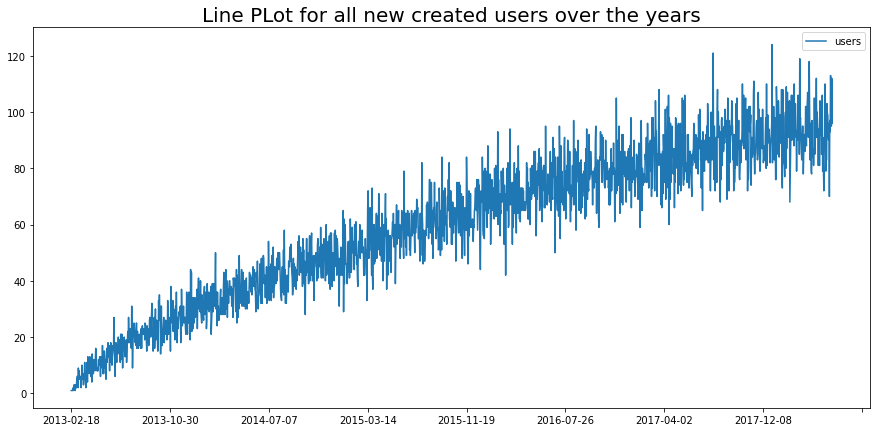

In [31]:
title='Line PLot for all new created users over the years' 

line_plot(x='DAY',y=['users'],df=created_at,title=title)

<h3>Conclusions</h3><br>
<b><li>Average number of new created users increases over the time

In [32]:
#Ceate a table containing the deleted users

deleted_at = sq('''
SELECT
  DATE(deleted_at) AS DAY,
  COUNT(*) AS deleted_users
FROM
  users
WHERE
  deleted_at IS NOT NULL
GROUP BY
  DAY
''')
deleted_at.head()

,DAY,deleted_users
0,2013-05-13,1
1,2013-07-01,1
2,2013-07-13,1
3,2013-08-05,2
4,2013-08-08,1


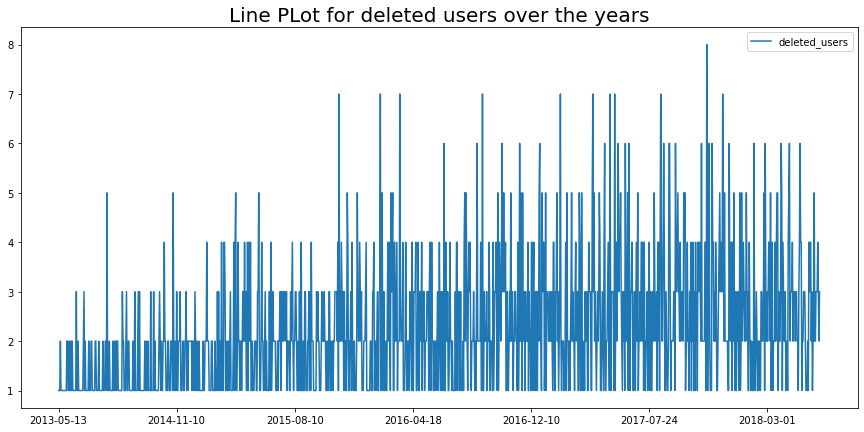

In [33]:
title='Line PLot for deleted users over the years' 

line_plot(x='DAY',y=['deleted_users'],df=deleted_at,title=title)

In [34]:
merged_at = sq('''
SELECT
  DATE(merged_at) AS DAY,
  COUNT(*) AS merged_users
FROM
  users
WHERE
  merged_at IS NOT NULL
  AND id <> parent_user_id
GROUP BY
  DAY
''')
merged_at.head()

,DAY,merged_users
0,2013-11-11,1
1,2013-11-15,1
2,2014-01-07,1
3,2014-01-31,1
4,2014-02-11,1


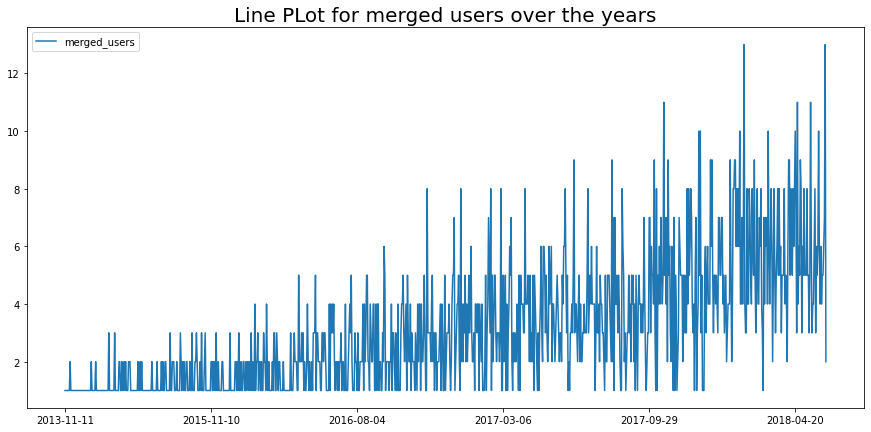

In [35]:
title='Line PLot for merged users over the years' 
line_plot(x='DAY',y=['merged_users'],df=merged_at,title=title)

In [36]:
temp = sq1('''
SELECT
  STRFTIME(new.day) AS DAY,
  new.new_added_users,
  COALESCE(deleted.deleted_users, 0) AS deleted_users,
  COALESCE(merged.merged_users, 0) AS merged_users,
  (
    new.new_added_users - COALESCE(deleted.deleted_users, 0) - COALESCE(merged.merged_users, 0)
  ) AS net_added_users
FROM
  (
    SELECT
      DATE(created_at) AS DAY,
      COUNT(*) AS new_added_users
    FROM
      users
    GROUP BY
      DAY
  ) new
  LEFT JOIN (
    SELECT
      DATE(created_at) AS DAY,
      COUNT(*) AS deleted_users
    FROM
      users
    WHERE
      deleted_at IS NOT NULL
    GROUP BY
      DAY
  ) deleted ON deleted.day = new.day
  LEFT JOIN (
    SELECT
      DATE(merged_at) AS DAY,
      COUNT(*) AS merged_users
    FROM
      users
    WHERE
      merged_at IS NOT NULL
    AND 
      id <> parent_user_id
    GROUP BY
      DAY
  ) merged ON merged.day = new.day
ORDER BY
  DAY DESC
''')
temp.head()

,Day,New Added Users,Deleted Users,Merged Users,Net Added Users
0,2018-06-01,96,0,2,94
1,2018-05-31,112,0,13,99
2,2018-05-30,95,0,7,88
3,2018-05-29,104,0,6,98
4,2018-05-28,113,0,5,108


In [37]:
temp['Day'] = pd.to_datetime(temp['Day'])

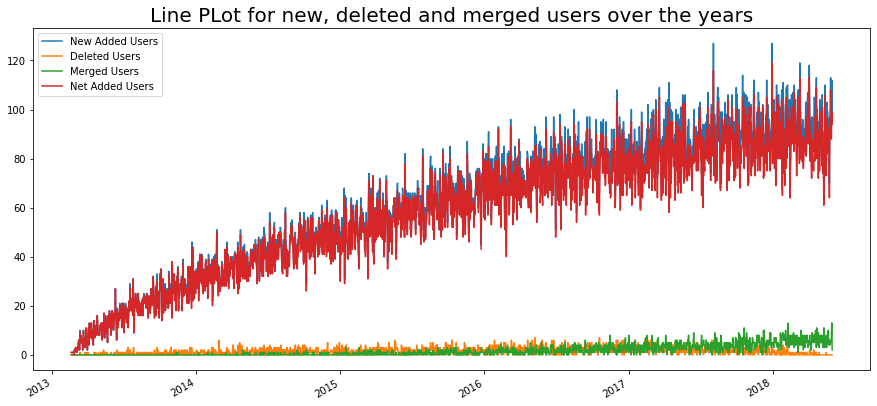

In [38]:
title='Line PLot for new, deleted and merged users over the years' 
line_plot(x='Day',y=['New Added Users','Deleted Users','Merged Users','Net Added Users'],df=temp,title=title)

<a id="Answering some quistions:"></a>
<h1>Let's answer some quistions</h1>

<a id="q1"></a>
<h3>How many users do we have?</h3>

In [39]:
user_count = sq1('''
SELECT 
  COUNT(DISTINCT(id)) as user_count 
FROM 
  users
''').values[0][0]

print('We have {} users'.format(user_count))

We have 117178 users


<a id="q2"></a>
<h3>What is the number of users who have ordered an item?</h3>

In [40]:
user_with_orders_count = sq1('''
SELECT COUNT(*) as number_of_users_who_have_ordered_an_item
FROM users u
INNER JOIN orders o
ON u.id = o.user_id
''').values[0][0]

print('We have {} users that have orderd items'.format(user_with_orders_count))

We have 47402 users that have orderd items


<a id="q3"></a>
<h3>What is the number of events for each event name?</h3>

In [41]:
event_name_count = sq1('''
SELECT
  event_name,
  count(*) AS event_count
FROM
  events
GROUP BY
  event_name
ORDER BY 
  event_count DESC
''')
event_name_count

,Event Name,Event Count
0,view_item,525572
1,test_assignment,324980
2,view_user_profile,3088


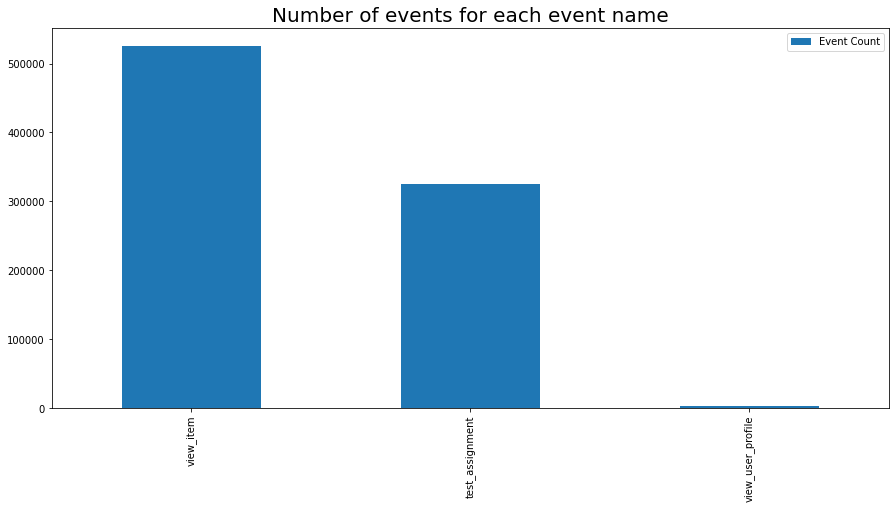

In [46]:
title = 'Number of events for each event name'
bar_plot(x='Event Name', y='Event Count',df=event_name_count,title=title)

<a id="q4"></a>
<h3>What is the number of events for each Platform?</h3>

In [43]:
events_platform_count = sq1('''
SELECT
  platform,
  count(*) AS platform_count
FROM
  events
GROUP BY
  platform
ORDER BY 
  platform_count DESC
''')
events_platform_count

,Platform,Platform Count
0,server,324980
1,web,267421
2,android,87501
3,mobile web,87224
4,iOS,86514


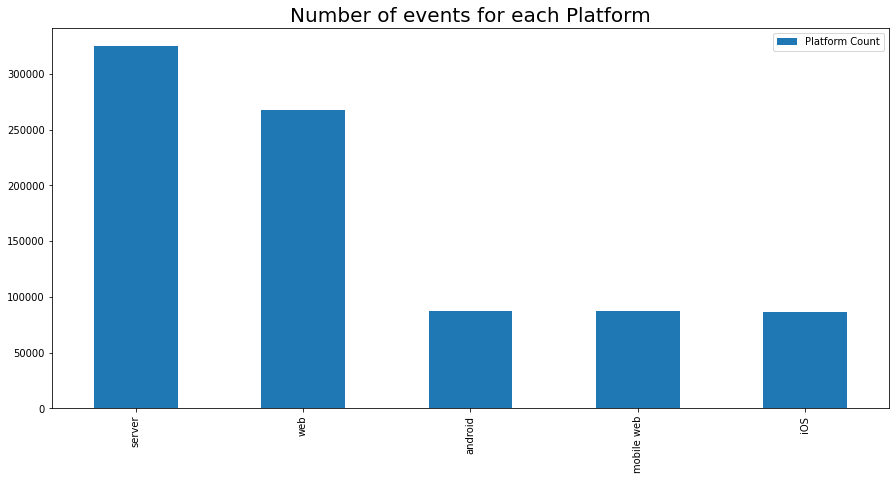

In [47]:
title = 'Number of events for each Platform'
bar_plot(x='Platform', y='Platform Count',df=events_platform_count,title=title)

<a id="q5"></a>
<h3>What is the number of items for sale in each category?</h3>

In [48]:
items_for_sale = sq1('''
SELECT category,
       COUNT(id) AS item_count
FROM items
GROUP BY category
ORDER BY item_count DESC;
''')
# items['category'].value_counts()
items_for_sale

,Category,Item Count
0,instrument,239
1,gadget,233
2,module,227
3,mechanism,225
4,tool,222
5,device,216
6,widget,212
7,dongle,211
8,apparatus,207
9,contraption,206


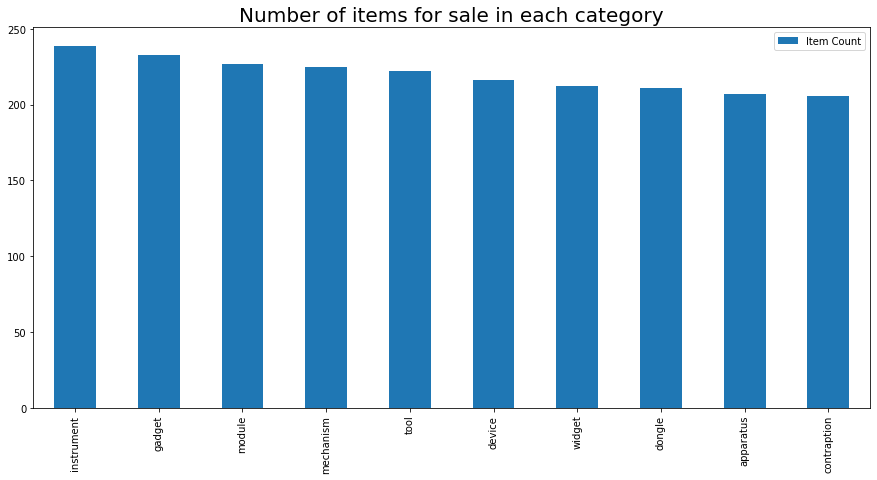

In [49]:
title = 'Number of items for sale in each category'
bar_plot(x='Category', y='Item Count',df=items_for_sale,title=title)

<a id="q6"></a>
<h3>What is the number of view user profile?</h3>

In [50]:
view_user_profile = sq1('''
SELECT
  (
    CASE
      WHEN first_view IS NULL THEN 'NO'
      ELSE 'YES'
    END
  ) AS has_viewed_profile_page,
  COUNT(user_id) AS users -- creates first_profile_views table
FROM
  (
    SELECT
      users.id AS user_id,
      MIN(event_time) AS first_view
    FROM
      users
      LEFT JOIN events ON EVENTS.user_id = users.id
      AND event_name = 'view_user_profile'
    GROUP BY
      users.id
  ) first_profile_views
GROUP BY
  has_viewed_profile_page;
''')
view_user_profile

,Has Viewed Profile Page,Users
0,NO,114143
1,YES,3035


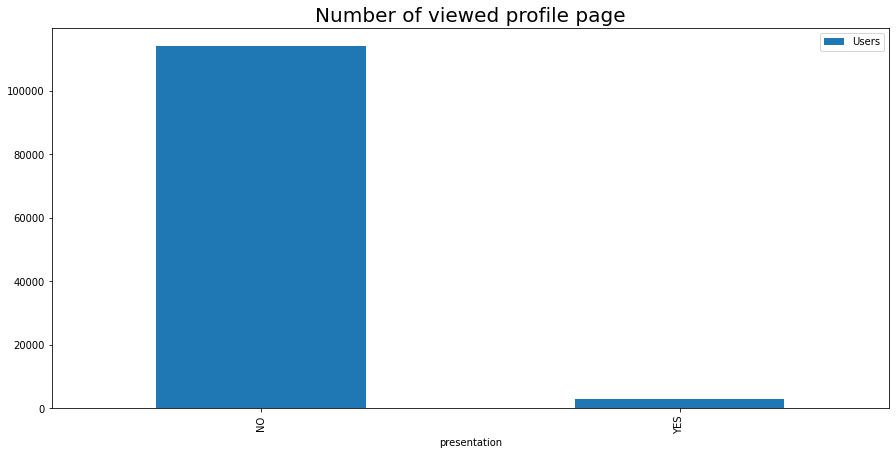

In [53]:
title = 'Number of viewed profile page'
bar_plot('Has Viewed Profile Page','Users',view_user_profile,title,'presentation')

<a id="q7"></a>
<h3>How many email address for each email domains?</h3>

In [54]:
#lets see the types of email domains do we have
import numpy as np
e_mail_domains = np.unique(users['email_address'].apply(lambda x:re.findall('@[\w]+'.lower(),x.lower())[0][1:]))
print('We have {} E-Mail domains:\n{}'.format(len(e_mail_domains),e_mail_domains))

We have 6 E-Mail domains:
['earthlink' 'gmail' 'inbox' 'mail' 'outlook' 'yahoo']


In [55]:
email_domain_users_count = pd.DataFrame(columns=e_mail_domains)
for email in e_mail_domains:
    q = '''SELECT COUNT(*)
           FROM users 
           WHERE email_address like '{}' '''.format('%@'+email+'.%')
    count = sq(q).values[0]
    email_domain_users_count[email] = count
email_domain_users_count = email_domain_users_count.T.sort_values(by=0,ascending=False).reset_index().\
                                        rename(columns={0:'Domain users count','index':'Domain name'})
email_domain_users_count

,Domain name,Domain users count
0,gmail,43854
1,outlook,14840
2,yahoo,14712
3,inbox,14657
4,earthlink,14579
5,mail,14536


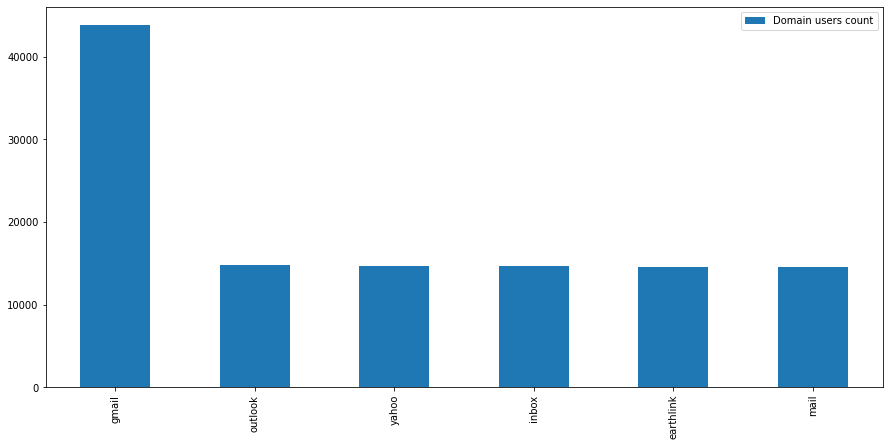

In [56]:
bar_plot('Domain name','Domain users count',email_domain_users_count,title='')

<a id="q8"></a>
<h3>Show the users who have viewed items?</h3>

In [57]:
view_item_event_1 = c.execute('''
CREATE TABLE IF NOT EXISTS view_item_event_1 AS
  SELECT
    event_id,
    DATE(event_time) AS event_time,
    user_id,
    platform,
    MAX(
      CASE
        WHEN parameter_name = 'item_id' THEN parameter_value
        ELSE NULL
      END
    ) AS item_id,
    MAX(
      CASE
        WHEN parameter_name = 'referrer' THEN parameter_value
        ELSE NULL
      END
    ) AS referrer
  FROM
    events
  WHERE
    event_name = 'view_item'
  GROUP BY
    event_id,
    event_time,
    user_id,
    platform
''')
view_item_event_1

In [58]:
#lets check our tables
sq('''
SELECT * FROM sqlite_master
''')

,type,name,tbl_name,rootpage,sql
0,table,users,users,2,"CREATE TABLE ""users"" (\n""created_at"" TEXT,\n ..."
1,table,orders,orders,2083,"CREATE TABLE ""orders"" (\n""invoice_id"" REAL,\n ..."
2,table,events,events,3246,"CREATE TABLE ""events"" (\n""event_id"" TEXT,\n ""..."
3,table,items,items,24011,"CREATE TABLE ""items"" (\n""adjective"" TEXT,\n ""..."
4,table,daterollup,daterollup,24057,"CREATE TABLE ""daterollup"" (\n""date"" TEXT,\n ""..."
5,table,view_item_event_1,view_item_event_1,24091,CREATE TABLE view_item_event_1(\n event_id TE...


<a id="q9"></a>
<h3>Create a tables for each event name (view_item, view_user_profile, test_assignment events)</h3>

In [59]:
events['event_name'].unique()

array(['view_item', 'view_user_profile', 'test_assignment'], dtype=object)

In [60]:
view_item_events = c.execute('''
CREATE TABLE IF NOT EXISTS view_item_events AS
  SELECT
    event_id,
    DATE(event_time) AS event_time,
    user_id,
    platform,
    MAX(
      CASE
        WHEN parameter_name = 'item_id' THEN parameter_value
        ELSE NULL
      END
    ) AS item_id,
    MAX(
      CASE
        WHEN parameter_name = 'referrer' THEN parameter_value
        ELSE NULL
      END
    ) AS referrer
  FROM
    events
  WHERE
    event_name = 'view_item'
  GROUP BY
    event_id,
    event_time,
    user_id,
    platform
''')

In [61]:
view_user_profile_event = c.execute('''
CREATE TABLE IF NOT EXISTS view_user_profile_event AS
SELECT
  event_id,
  DATETIME(event_time) AS event_time,
  user_id,
  platform,
  MAX(CASE WHEN parameter_name = 'viewed_user_id' THEN parameter_value
      ELSE NULL
      END) as viewed_user_id
FROM
  EVENTS
WHERE
  event_name = 'view_user_profile'
GROUP BY
  event_id,
  event_time,
  user_id,
  platform
''')

In [62]:
test_assignment_event = c.execute('''
CREATE TABLE IF NOT EXISTS test_assignment_event AS
SELECT
  event_id,
  DATETIME(event_time) AS event_time,
  user_id,
  platform,
  MAX(CASE WHEN parameter_name = 'test_assignment' THEN parameter_value
      ELSE NULL
      END) as test_assignment,
  MAX(CASE WHEN parameter_name = 'test_id' THEN parameter_value
      ELSE NULL
      END) as test_id
FROM
  EVENTS
WHERE
  event_name = 'test_assignment'
GROUP BY
  event_id,
  event_time,
  user_id,
  platform
''')

In [63]:
#lets check our tables
sq('''
SELECT * 
FROM sqlite_master
''')

,type,name,tbl_name,rootpage,sql
0,table,users,users,2,"CREATE TABLE ""users"" (\n""created_at"" TEXT,\n ..."
1,table,orders,orders,2083,"CREATE TABLE ""orders"" (\n""invoice_id"" REAL,\n ..."
2,table,events,events,3246,"CREATE TABLE ""events"" (\n""event_id"" TEXT,\n ""..."
3,table,items,items,24011,"CREATE TABLE ""items"" (\n""adjective"" TEXT,\n ""..."
4,table,daterollup,daterollup,24057,"CREATE TABLE ""daterollup"" (\n""date"" TEXT,\n ""..."
5,table,view_item_event_1,view_item_event_1,24091,CREATE TABLE view_item_event_1(\n event_id TE...
6,table,view_item_events,view_item_events,29058,CREATE TABLE view_item_events(\n event_id TEX...
7,table,view_user_profile_event,view_user_profile_event,34025,CREATE TABLE view_user_profile_event(\n event...
8,table,test_assignment_event,test_assignment_event,34084,CREATE TABLE test_assignment_event(\n event_i...


In [64]:
view_item_events = sq('''SELECT * FROM view_item_events''')
view_item_events.head()

,event_id,event_time,user_id,platform,item_id,referrer
0,00009c5122b04bc09d7677b5bae641c8,2017-10-06,198519.0,mobile web,3241,shopping_cart
1,0000ac00b5b741a8928a911dc3448cb2,2014-07-25,31861.0,web,2260,home
2,00015a1e375441328232db147a6bc34e,2018-04-07,283465.0,web,2889,home
3,0001d177b6ad410b8587fbea553810c8,2015-10-15,67361.0,android,3014,item_page
4,0001fd08f7e745f2903a4a34a046bcce,2017-11-09,237955.0,web,1424,google_search


In [65]:
test_assignment_event = sq('''SELECT * FROM test_assignment_event''')
test_assignment_event.head()

,event_id,event_time,user_id,platform,test_assignment,test_id
0,00003d71b9cb41469c05af608a6d2145,2014-04-28 15:23:00,147689.0,server,1,5
1,00012e89e2f54bf99180dde02c63e4ad,2016-11-06 15:23:09,225112.0,server,1,7
2,00012e8f6da84f33ab9ff53901f5a2f3,2014-04-10 15:23:05,130289.0,server,1,6
3,00018d8326b64ce7b016b90282b0d81e,2014-05-13 15:23:05,86365.0,server,0,6
4,0001abcf9b824630856a246877a6ef4b,2013-10-19 15:23:00,51995.0,server,1,5


In [66]:
view_user_profile_event = sq('''SELECT * FROM view_user_profile_event ''')
view_user_profile_event.head()

,event_id,event_time,user_id,platform,viewed_user_id
0,0037e628eb0e4ff29b914a8f70db907e,2015-05-02 02:50:41,56605.0,web,8582
1,00388b81b5c64e58a24b8c9854780a36,2017-09-07 10:19:54,100369.0,web,228236
2,008bb7d54eb04364876b35cdf5c6d2d4,2017-10-17 09:40:28,230568.0,web,25178
3,009fcbecc369449f881648a727c762c2,2017-09-11 03:02:18,214788.0,web,54626
4,00a0ed07eb194c81b144bc117aaf7931,2018-02-19 14:21:19,194117.0,android,254386


<a id="q10"></a>
<h3>What percent of users have viewed items for each product category?</h3>

In [67]:
cat_users_viewed_count = sq1(''' 
WITH view_item_event_category_group AS (
  SELECT
    i.category AS category,
    v.user_id AS user_id
  FROM
    view_item_events v
    LEFT JOIN items i ON i.id = v.item_id
)
SELECT
  category,
  count(DISTINCT user_id) AS users_viewed_count
FROM
  view_item_event_category_group
GROUP BY
  category
''')
# sq('''
# SELECT
#   items.category,
#   count(DISTINCT user_id)
# FROM
#   view_item_event
#   JOIN items ON items.id = view_item_event.item_id
# GROUP BY
#   items.category
# ''')
cat_users_viewed_count

,Category,Users Viewed Count
0,apparatus,10695
1,contraption,10680
2,device,10580
3,dongle,10490
4,gadget,10623
5,instrument,10484
6,mechanism,10594
7,module,10571
8,tool,10426
9,widget,10605


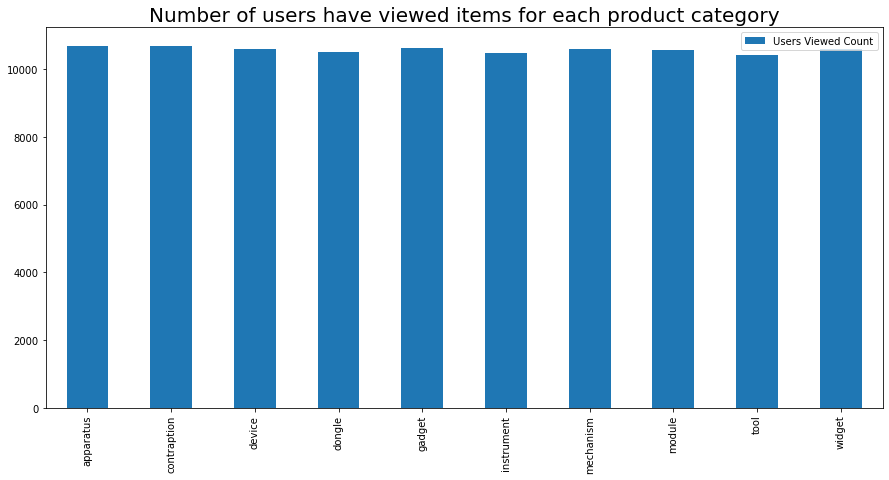

In [68]:
title='Number of users have viewed items for each product category'
bar_plot('Category','Users Viewed Count',cat_users_viewed_count,title)

<a id="q11"></a>
<h3>How many items have been purchased and how many items do we have?</h3>

In [69]:
sq1('''
SELECT
  COUNT(DISTINCT(items.id)) AS items_count,
  COUNT(orders.item_id) AS items_ever_purchased_count
FROM
  orders
  JOIN items ON items.id = orders.item_id
''')

,Items Count,Items Ever Purchased Count
0,2198,47402


<a id="q12"></a>
<h3>How many items have been purchased for each category?</h3>

In [70]:
sq1('''
SELECT
  o.item_category AS category,
  COUNT(DISTINCT COALESCE(parent_user_id, user_id)) AS user_with_orders
FROM
  orders o
  JOIN users u ON u.id = o.user_id
GROUP BY
  o.item_category
ORDER BY
  user_with_orders DESC
''')

,Category,User With Orders
0,apparatus,2028
1,widget,2015
2,contraption,2008
3,module,1999
4,instrument,1997
5,device,1994
6,mechanism,1981
7,gadget,1978
8,tool,1971
9,dongle,1963


<a id="q13"></a>
<h3>How many orders are placed each day?</h3>

In [71]:
num_each_day = sq1('''
SELECT
  DATE(paid_at) AS DAY,
  COUNT(DISTINCT invoice_id) AS orders,
  COUNT(DISTINCT line_item_id) AS line_items
FROM
  orders
GROUP BY
  DAY
ORDER BY
  DAY DESC;
''')
num_each_day

,Day,Orders,Line Items
0,2018-06-04,4,11
1,2018-06-03,6,15
2,2018-06-02,8,21
3,2018-06-01,8,17
4,2018-05-31,14,32
...,...,...,...
1811,2013-04-13,1,1
1812,2013-04-07,1,3
1813,2013-03-29,1,3
1814,2013-03-27,1,1


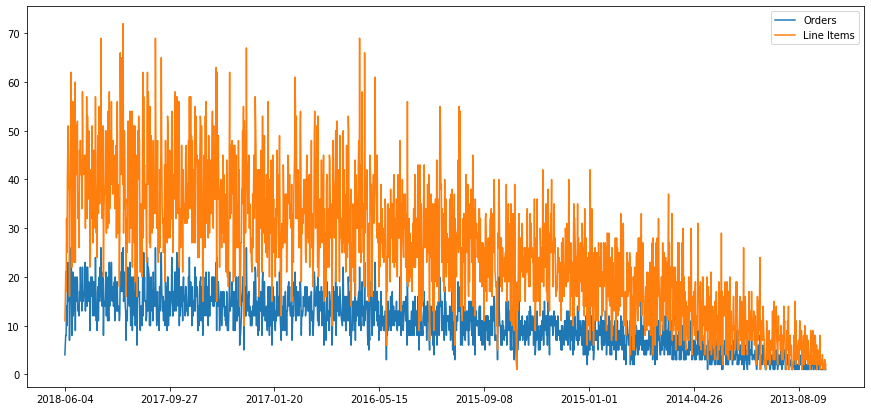

In [75]:
line_plot(num_each_day, 'Day', ['Orders','Line Items'], title='')

<a id="q14"></a> 
<h3>What is the most recently viewed item for each user?</h3>

In [76]:
#first lets create a tabe with recently viewed events for each user
recent_views = c.execute('''
CREATE TABLE IF NOT EXISTS 'recent_views' AS
SELECT
  user_id,
  item_id,
  event_time,
  ROW_NUMBER() OVER (
    PARTITION BY user_id
    ORDER BY
      event_time DESC
  ) AS row_number,
  RANK() OVER (
    PARTITION BY user_id
    ORDER BY
      event_time DESC
  ) AS rank,
  DENSE_RANK() OVER (
    PARTITION BY user_id
    ORDER BY
      event_time DESC
  ) AS dense_rank
FROM
  view_item_events
''')

In [77]:
recent_views = sq('''SELECT * FROM recent_views''')
recent_views.head()

,user_id,item_id,event_time,row_number,rank,dense_rank
0,4.0,3924,2013-09-04,1,1,1
1,4.0,2712,2013-07-05,2,2,2
2,4.0,2248,2013-07-03,3,3,3
3,8.0,2430,2013-07-26,1,1,1
4,8.0,2079,2013-07-25,2,2,2


<b><li>Window Function: It is a function that computes a value on a certain partition, or window, of the data that is specified in the PARTITION BY statement.
<li>You can see <a href='https://sqlite.org/windowfunctions.html'>windowfunctions</a></h3>

In [78]:
#lets join recent_views, users, items tables together 
c.execute('''
CREATE TABLE IF NOT EXISTS 'full_recent_view' AS
SELECT
  u.id AS user_id,
  (u.first_name || ' ' || u.last_name) AS name,
  i.id AS item_id,
  event_time,
  row_number,
  rank,
  dense_rank,
  u.created_at,
  i.category
FROM
  recent_views r
  LEFT JOIN users u ON r.user_id = u.id
  LEFT JOIN items i ON r.item_id = i.id
''')

In [79]:
full_recent_view = sq('''SELECT * FROM full_recent_view ''')
full_recent_view.head()

,user_id,name,item_id,event_time,row_number,rank,dense_rank,created_at,category
0,4.0,L Murphy,3924.0,2013-09-04,1,1,1,2013-03-04 00:06:49,device
1,4.0,L Murphy,2712.0,2013-07-05,2,2,2,2013-03-04 00:06:49,dongle
2,4.0,L Murphy,2248.0,2013-07-03,3,3,3,2013-03-04 00:06:49,dongle
3,8.0,Hanah Schmidt,2430.0,2013-07-26,1,1,1,2013-02-18 22:10:23,gadget
4,8.0,Hanah Schmidt,2079.0,2013-07-25,2,2,2,2013-02-18 22:10:23,gadget


In [80]:
#now we need to get the needed information about the item they viewed more recently.
sq('''
SELECT u.id AS user_id,
  (u.first_name || ' ' || u.last_name) AS name,
  i.id AS item_id,
  i.name AS item_name,
  event_time,
  row_number,
  u.created_at,
  i.category
from full_recent_view r
JOIN users u
  ON u.id = r.user_id
JOIN items i
  ON i.id = r.item_id
''')

,user_id,name,item_id,item_name,event_time,row_number,created_at,category
0,4.0,L Murphy,3924.0,organic device how-to-manual,2013-09-04,1,2013-03-04 00:06:49,device
1,4.0,L Murphy,2712.0,miniature dongle wrapper,2013-07-05,2,2013-03-04 00:06:49,dongle
2,4.0,L Murphy,2248.0,dongle warmer,2013-07-03,3,2013-03-04 00:06:49,dongle
3,8.0,Hanah Schmidt,2430.0,gadget refill,2013-07-26,1,2013-02-18 22:10:23,gadget
4,8.0,Hanah Schmidt,2079.0,gadget storage_unit,2013-07-25,2,2013-02-18 22:10:23,gadget
...,...,...,...,...,...,...,...,...
262781,298552.0,I Sargsyan,275.0,aerodynamic gadget,2018-06-01,1,2018-05-24 21:34:56,gadget
262782,298817.0,S Miller,931.0,miniature device cleaner,2018-05-28,1,2018-05-29 21:21:09,device
262783,298817.0,S Miller,3806.0,extra-strength device opener,2018-05-26,2,2018-05-29 21:21:09,device
262784,298817.0,S Miller,755.0,extra-strength device wrapper,2018-05-26,3,2018-05-29 21:21:09,device


In [81]:
#now select the most recently viewed for each user(row_view = 1)
c.execute('''
CREATE TABLE IF NOT EXISTS 'recent_view_user' AS
SELECT
  COALESCE(users.parent_user_id, users.id) AS user_id,
  (users.first_name || ' ' || users.last_name) AS name,
  items.id AS item_id,
  items.name AS item_name,
  event_time,
  users.created_at,
  items.category
FROM
  full_recent_view
  JOIN users ON users.id = full_recent_view.user_id
  JOIN items ON items.id = full_recent_view.item_id
  LEFT JOIN orders
  /*LEFT OUTER JOIN to filter the users who viewed and ordered*/
  ON orders.item_id = full_recent_view.item_id
  AND orders.user_id = full_recent_view.user_id
WHERE
  row_number = 1
  AND users.deleted_at IS NOT NULL
  AND orders.item_id IS NULL
''')

In [82]:
sq('''
SELECT * FROM recent_view_user 
''')

,user_id,name,item_id,item_name,event_time,created_at,category
0,193669.0,Mary Scientist,2198.0,aerodynamic gadget,2013-10-09,2013-03-25 00:30:21,gadget
1,214268.0,Santiago Brown,2659.0,matte instrument storage_unit,2013-04-04,2013-03-30 01:20:12,instrument
2,1033.0,Riya Anand,3271.0,miniature instrument refill,2013-08-11,2013-04-21 00:12:36,instrument
3,8442.0,R Wilson,3863.0,fuzzy widget cleaner,2013-09-01,2013-05-04 02:39:12,widget
4,1209.0,S Kruger,334.0,digital widget cleaner,2013-09-28,2013-04-28 10:16:16,widget
...,...,...,...,...,...,...,...
1468,273346.0,Katherine Adams,3016.0,glossy dongle wrapper,2018-03-27,2018-02-22 08:37:47,dongle
1469,276409.0,Noah Ahmad,2410.0,miniature tool warmer,2018-05-08,2018-03-02 17:48:03,tool
1470,278739.0,A Rodriquez,2002.0,analog mechanism,2018-04-24,2018-03-28 14:36:26,mechanism
1471,283645.0,Lisa Kim,2469.0,industrial-strength contraption charger,2018-04-21,2018-04-10 21:25:39,contraption


<a id="q15"></a>
<h3>How long ago was their most recent view?</h3>

In [83]:
sq1('''
SELECT
  recent_view_user.*,
(DATETIME('now') - DATETIME(created_at)) AS date_difference
FROM
  recent_view_user
''')

,User Id,Name,Item Id,Item Name,Event Time,Created At,Category,Date Difference
0,193669.0,Mary Scientist,2198.0,aerodynamic gadget,2013-10-09,2013-03-25 00:30:21,gadget,9
1,214268.0,Santiago Brown,2659.0,matte instrument storage_unit,2013-04-04,2013-03-30 01:20:12,instrument,9
2,1033.0,Riya Anand,3271.0,miniature instrument refill,2013-08-11,2013-04-21 00:12:36,instrument,9
3,8442.0,R Wilson,3863.0,fuzzy widget cleaner,2013-09-01,2013-05-04 02:39:12,widget,9
4,1209.0,S Kruger,334.0,digital widget cleaner,2013-09-28,2013-04-28 10:16:16,widget,9
...,...,...,...,...,...,...,...,...
1468,273346.0,Katherine Adams,3016.0,glossy dongle wrapper,2018-03-27,2018-02-22 08:37:47,dongle,4
1469,276409.0,Noah Ahmad,2410.0,miniature tool warmer,2018-05-08,2018-03-02 17:48:03,tool,4
1470,278739.0,A Rodriquez,2002.0,analog mechanism,2018-04-24,2018-03-28 14:36:26,mechanism,4
1471,283645.0,Lisa Kim,2469.0,industrial-strength contraption charger,2018-04-21,2018-04-10 21:25:39,contraption,4


<a id="16"></a>
<h3>How many users have reordered an item?</h3>

In [84]:
sq1('''
SELECT COUNT(DISTINCT user_id) as users_re_ordered
FROM
  ( SELECT user_id,
           COUNT(DISTINCT invoice_id) AS order_count
   FROM orders
   GROUP BY user_id ) user_level
WHERE order_count > 1;
''')

,Users Re Ordered
0,1421


<a id="q17"></a>
<h3>How many users have reordered the same item?</h3>

In [85]:
sq1('''
SELECT
  COUNT(*) as re_order_the_same_item
FROM
  (
    SELECT
      user_id,
      item_id,
      COUNT (DISTINCT line_item_id) AS times_user_ordered
    FROM
      orders
    GROUP BY
      user_id,
      item_id
  )
WHERE
  times_user_ordered > 1;
''')

,Re Order The Same Item
0,211


<a id="q18"></a>
<h3>How many orders per items?</h3>

In [86]:
sq1('''
SELECT
  item_id,
  name,
  category,
  orders_count
FROM
  (
    SELECT
      item_id,
      count(invoice_id) orders_count
    FROM
      orders
    GROUP BY
      item_id
  ) AS orders
  LEFT JOIN items ON items.id = orders.item_id
ORDER BY
  Orders_Count DESC
''')

,Item Id,Name,Category,Orders Count
0,3486.0,extra-strength tool opener,tool,40
1,1679.0,matte apparatus wrapper,apparatus,39
2,1119.0,rechargable apparatus carrying_case,apparatus,38
3,1812.0,analog gadget cleaner,gadget,37
4,730.0,organic apparatus carrying_case,apparatus,36
...,...,...,...,...
2193,3946.0,aerodynamic mechanism storage_unit,mechanism,10
2194,1034.0,reflective dongle,dongle,9
2195,2677.0,organic instrument storage_unit,instrument,9
2196,2846.0,prize-winning gadget carrying_case,gadget,9


<a id="q19"></a>
<h3>How many orders per category?</h3>

In [87]:
sq1('''
SELECT
  category,
  count(*) AS orders_by_category
FROM
  orders
  LEFT JOIN items ON items.id = orders.item_id
GROUP BY
  category
ORDER BY
  orders_by_category DESC;
''')

,Category,Orders By Category
0,apparatus,4892
1,widget,4809
2,module,4800
3,instrument,4767
4,device,4735
5,mechanism,4706
6,contraption,4700
7,gadget,4695
8,dongle,4665
9,tool,4633


In [88]:
#lets try the previous example with pandas 
temp = orders.set_index('item_id').join(items.set_index('id'),how='left',lsuffix='_caller', rsuffix='_other')
temp['category'].value_counts().to_frame().rename(columns={'category':'Category Count'})

,Category Count
apparatus,4892
widget,4809
module,4800
instrument,4767
device,4735
mechanism,4706
contraption,4700
gadget,4695
dongle,4665
tool,4633


<a id="q20"></a>
<h3>What is the avgerage times each category has ordered?</h3>

In [89]:
sq('''
SELECT item_category,
  AVG(times_category_ordered) AS avg_times_category_ordered
FROM
  (SELECT user_id,
          item_category,
          COUNT(DISTINCT line_item_id) AS times_category_ordered
   FROM orders
   GROUP BY user_id,
            item_category) user_level
GROUP BY item_category
''')

,item_category,avg_times_category_ordered
0,apparatus,2.412229
1,contraption,2.339472
2,device,2.373434
3,dongle,2.376465
4,gadget,2.372410
5,instrument,2.384692
6,mechanism,2.374369
7,module,2.400000
8,tool,2.350583
9,widget,2.385417


<a id="q21"></a>
<h3>What is the average time between orders?</h3>

In [90]:
sq1('''
SELECT first_orders.user_id,
       DATE(first_orders.paid_at) AS first_order_date,
       DATE(second_orders.paid_at) AS second_order_date,
       DATE(second_orders.paid_at) - DATE(first_orders.paid_at) AS date_diff
FROM
    (SELECT user_id,
            invoice_id,
            paid_at,
            DENSE_RANK() OVER (PARTITION BY user_id
                               ORDER BY paid_at ASC) AS order_num
   FROM orders) first_orders
JOIN
  (SELECT user_id,
          invoice_id,
          paid_at,
          DENSE_RANK() OVER (PARTITION BY user_id
                             ORDER BY paid_at ASC) AS order_num
   FROM orders) second_orders
  ON first_orders.user_id = second_orders.user_id
WHERE first_orders.order_num = 1
  AND second_orders.order_num = 2;

''')

,User Id,First Order Date,Second Order Date,Date Diff
0,694.0,2013-04-13,2013-08-18,0
1,694.0,2013-04-13,2013-08-18,0
2,694.0,2013-04-13,2013-08-18,0
3,849.0,2013-07-07,2013-07-31,0
4,849.0,2013-07-07,2013-07-31,0
...,...,...,...,...
8979,284905.0,2018-04-24,2018-05-10,0
8980,284905.0,2018-04-24,2018-05-10,0
8981,284905.0,2018-04-24,2018-05-10,0
8982,284905.0,2018-04-24,2018-05-10,0


<a id="filter"></a>
<h2>lets create a filter function  to apply a filter on our data using pandas</h2>

In [91]:
#first lets load all the data we have in this dictionary
all_data = {} 
dfs = tables['name'].values
for df_name in dfs:
    q = '''SELECT *
           FROM {}'''.format(df_name)
    temp = sq(q)
    all_data[df_name] = temp

In [92]:
#create a filter funstion that takes the naame of table, the column in this table and the filter to apply
def apply_filter():       
    print('Let\'s apply some filters to the data')
    
    #take the name of table from the user to load it
    while True:
        print('All data : {}'.format(all_data.keys()))
        data_name = str(input('Enter the name of data to apply filter on it or end to close : '))
        if data_name.lower()=='end':
            return False
        if data_name not in all_data.keys():
            print('Not in data, Please try again!')
        else:
            break
            
    data = all_data[data_name]
    
    #take the name of column in this table from the user
    while True:
        print('All columns : {}'.format(all_data[data_name].columns))
        column = str(input('Enter the column to apply your filter or end to close : '))
        if column.lower()=='end':
            return False
        if column not in data.columns:
            print('Not in data, Please try again!')
        else:
            break
            
    col_type = all_data[data_name][column].dtypes

        
    #take the filter from the user to apply
    while True:
        if col_type == 'object':
            print('Type of column is : {}'.format(col_type),'\n',all_data[data_name][column].unique())
            app_filter = input('Enter the filter (that has the same type) to apply or type end to close  : ')
        else: 
            print('Type of column is : {}'.format(col_type))
            app_filter = input('Enter the filter (that has the same type) to apply or type end to close  : ')
        if app_filter.lower()=='end':
            return False
        if app_filter not in data[column].unique():
            print('Not in data, Please try again!')
            print(app_filter,type(app_filter))
        else:
            break

    print('-'*40)
    return data_name,column,app_filter

### Just remove the comment and run the code

In [95]:
def main():
    while True:
        
        data_name,column,app_filter=apply_filter()
        print('Your data is ready \n')
        data = all_data[data_name]
        new_data = data[data[column]==app_filter]
        print(new_data)
        restart = input('\nWould you like to restart? Enter yes or no.\n')
        if restart.lower() != 'yes':
            break

#  return new_data
    
# if __name__ == "__main__":
#     main()

<h1 align="center"> Thanks</h1>